In [34]:
### ANOVA Test :

# Istatistikte farkli gruplar arasindaki ortalamalarin birbirinden anlamli bir sekilde farkli olup olmadigini belirlemek icin kullanilir.
# Iki grup karsilastirmasi yapilirken genellikle t testi kullanilir ama grup sayisi ikiden fazlaysa ANOVA testi kullanilir.
# H0 ve H1 hipotezleri belirlenir.
# H0 (Null Hipotezi) : Tum grup ortalamalari esittir.
# H1 (Alternatif Hipotez) : En az bir grup ortalamasi digerlerinden farklidir.

In [36]:
### Paired Test (Bagimli Test) :

# Iki veri grubunun birbiriyle bagimli oldugu durumlarda kullanilir.
# Ornegin bir tedavinin oncesinde ve sonrasinda olculen degerler.

In [38]:
### Unpaired Test (Bagimsiz Test) :

# Iki veri grubunun birbirinden bagimsiz oldugu durumlarda kullanilir.
# Ornegin erkek ve kadinlarin stres seviyelerini karsilastirmak icin uygulanan test.

In [40]:
import pandas as pd
df_stck=pd.read_feather('stack_overflow.feather')
df_stck

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,62812.0,I am a developer by profession,Yes,40.0,10.0,child,Yearly,145000.0,145000.0,United States,...,Too long,No,"Computer science, computer engineering, or sof...",Flask;jQuery,Angular;Angular.js;Flask;jQuery;React.js,Somewhat less welcome now than last year,50.0,30.0,20.0,At least 30
2257,62835.0,I am a developer by profession,Yes,23.0,9.0,child,Monthly,180000.0,33972.0,Russian Federation,...,Too short,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET Core;Flask,Just as welcome now as I felt last year,60.0,8.0,3.0,Under 30
2258,62837.0,I am a developer by profession,Yes,27.0,8.0,child,Monthly,7500.0,97284.0,Germany,...,Appropriate in length,No,Mathematics or statistics,None,None,Just as welcome now as I felt last year,42.0,12.0,2.0,Under 30
2259,62867.0,"I am not primarily a developer, but I write co...",Yes,33.0,13.0,child,Monthly,6000.0,72000.0,Panama,...,Too long,No,"Another engineering discipline (such as civil,...",None,Django;React.js,A lot less welcome now than last year,45.0,15.0,2.0,At least 30


In [42]:
df_stck['job_sat'].value_counts()

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

<Axes: xlabel='converted_comp', ylabel='job_sat'>

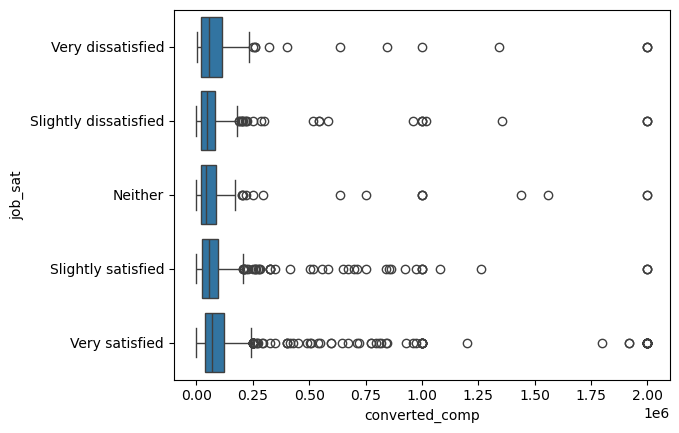

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='converted_comp',y='job_sat',data=df_stck)

In [46]:
import pingouin # pingouin phytonda istatistiksel analizler icin kullanilir.
pingouin.anova(data=df_stck,dv='converted_comp',between='job_sat') # ANOVA testi yapar.
# dv nin icerisine bagimli degisken girilir. (Gruplar arasi test edilen degisken.)
# between in icerisine bagimsiz degisken girilir. (Gruplarin hangi degiskene gore belirlenecegi.)
# dv nin icerisine girilen deger her zaman sayisal olmali. (!!!)
# Source : ANOVA'daki varyans kaynaklari.
# ddof1 : Gruplar arasindaki serbestlik olcusu. (Analizde kullanılan veri noktası sayısıyla ilgili matematiksel bir ölçü) 
# ddof2 : Gruplar icindeki serbestlik derecesi.
# F : F istatistigini temsil eder. (Gruplar arasındaki varyansın gruplar içindeki varyansa oranıdır) (F değeri ne kadar yüksekse, gruplar 
# arasındaki farkların anlamlı olma ihtimali o kadar artar.)
# p-unc : Elde edilen p degerini gosterir. (Gruplar arasındaki farkın rastgele oluşma olasılığını temsil eder.) (Eğer p≤0.05 : Gruplar 
# arasındaki fark istatistiksel olarak anlamlıdır.) (Eğer p>0.05 : Gruplar arasında anlamlı bir fark yoktur.)
# np2 Kısmi Eta Kare (Partial Eta Squared) : Gruplar arasındaki farkın etkisinin büyüklüğünü ölçen bir etkilik (effect size) ölçüsüdür.
# (0.01 : Kucuk Etki, 0.06 : Orta Duzey Etki, 0.14 : Buyuk Etki)

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


In [48]:
### Pairwise Test :

# Bir grup icerisindeki elemanlarin ciftler halinda karsilastirildigi istatiksel bir analiz yontemidir.
# Normalde hepsi tek tek yapilir fakat pingouin icinde tüm gruplar arasindaki farki gormeyi sagliyor.

In [50]:
pingouin.pairwise_tests(data=df_stck,dv='converted_comp',between='job_sat',padjust='none')
# padjust p degerleri uzerinde duzeltme yapar.
# between sutunundan 2 eleman cifti alarak converted_comp taki bir elemanla karsilastirir.
# Contrast : Karsilastirma yapilacak sutun.
# A ve B : job_sat sutunundaki kategorik degerler.
# Paired : Gruplarin eslesip eslesmedigini belirtir.
# Parametric : Kullanilan testin parametrik olup olmadigini belirtir.
# T : Hesaplanan t-istatistiği değerini içerir. (T-istatistiği, gruplar arasındaki farkın büyüklüğünü ölçer.)
# dof : Serbestlik derecesi.
# alternative : Kullanılan hipotez testinin yönünü belirtir. (two-sided : Çift yönlü test (farkın yönüne bakılmaksızın anlamlılık test edilir)
# .) (greater : Grup A'nın Grup B'den anlamlı şekilde daha büyük olduğu test edilir.) (less : Grup A'nın Grup B'den anlamlı şekilde daha 
# küçük olduğu test edilir.)
# p-unc : p degerini gosterir.
# BF10 (Bayes Factor) : Bayes istatistiklerinde, verilerin alternatif hipotezi ne kadar desteklediğini gösterir. (BF10 > 1: Alternatif 
# hipotez lehinedir.) (BF10 < 1: Null hipotez lehinedir.)
# hedges'g (Etki Buyuklugu) : Gruplar arasındaki farkın büyüklüğünü ifade eden standartlaştırılmış bir ölçüdür. (Küçük Etki : 0.2 civarı.)
# (Orta Etki : 0.5 civarı.) (Büyük Etki: 0.8 ve üzeri.)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931


In [52]:
# ANOVA genel cevaplari verirken, pairwise tum cevaplari verir.

In [54]:
pingouin.pairwise_tests(data=df_stck,dv='converted_comp',between='job_sat',padjust='bonf')
# Bonferroni düzeltmesi, yapılan karşılaştırmaların sayısına bağlı olarak, her bir karşılaştırmanın p-değerini küçültür. Bu, çoklu testlerin
# p-değerlerini aşırı derecede küçük hale getirmeyi ve böylece tip I hata (yanlış pozitif sonuç) riskini azaltmayı amaçlar.
# Eğer 5 karşılaştırma yapılıyorsa, her bir karşılaştırma için elde edilen p-değeri, 5 ile çarpılarak düzeltme yapılır.
# Eğer bir karşılaştırmanın p-değeri 0.02 ise, Bonferroni düzeltmesi ile bu p-değeri 0.02 * 5 = 0.10'a yükseltilir.
# Bu düzeltme, çoklu testlerin sonucu olarak yanlış pozitif bulguların riskini azaltmak için yaygın olarak kullanılır.
# p-unc (uncorrected p-value) : Bu sütun, düzeltme yapılmadan hesaplanan ham p-değerlerini içerir.
# p-corr (corrected p-value) : p-corr, çoklu karşılaştırmaların etkisi göz önüne alınarak düzeltilmiş p-değerini gösterir. Bu düzeltme, 
# yapılan test sayısına bağlı olarak p-değerlerini daha güvenilir hale getirir.
# p-adjust (adjusted p-value using the specified method) : p-adjust, seçilen düzeltme yöntemine göre p-değerinin düzeltilmiş halini içerir.
# Burada, padjust='bonf' parametresi kullanıldığı için Bonferroni düzeltmesi uygulanır.

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931


In [56]:
# none , bonf, sidak, holm, fdr_bh, fdr_by'i correction olarak kullanabiliriz.

In [58]:
pingouin.pairwise_tests(data=df_stck,dv='converted_comp',between='job_sat',padjust='sidak')
# Sidák düzeltmesinde her bir p-değeri, 1 - (1 - p) ^ k formülüyle düzeltilir. Burada k yapılan karşılaştırma sayısını ifade eder.
# Genellikle Sidák düzeltmesi, Bonferroni düzeltmesine göre daha az muhafazakar ve daha güçlüdür.

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.950487,sidak,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,0.999850,sidak,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,0.911344,sidak,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,0.997715,sidak,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,0.999639,sidak,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,1.000000,sidak,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.021449,sidak,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,0.998664,sidak,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.640665,sidak,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000637,sidak,158.564,-0.192931


In [60]:
pingouin.pairwise_tests(data=df_stck,dv='converted_comp',between='job_sat',padjust='holm')
# Holm-Bonferroni düzeltmesi, Bonferroni düzeltmesinin geliştirilmiş bir versiyonudur ve daha güçlüdür.
# Holm yöntemi, p-değerlerini küçükten büyüğe sıralar ve her p-değerini sırasıyla belirli bir düzeltme faktörüyle karşılaştırır.
# İlk p-değeri, k karşılaştırma sayısına bölünür.
# İkinci p-değeri, k-1 karşılaştırma sayısına bölünür. ...
# Elde edilen p-değerleri, önceki p-değerinden daha küçük olmalı, aksi takdirde test reddedilir.

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,holm,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,1.000000,holm,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,1.000000,holm,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,1.000000,holm,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,1.000000,holm,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,1.000000,holm,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.019493,holm,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,1.000000,holm,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.778291,holm,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,holm,158.564,-0.192931


In [62]:
pingouin.pairwise_tests(data=df_stck,dv='converted_comp',between='job_sat',padjust='fdr_bh')
### FDR (False Discovery Rate) Düzeltmesi veya Benjamini-Hochberg Yöntemi : 
# FDR (Yanlış Keşif Oranı), çoklu karşılaştırmalarda yapılan yanlış pozitiflerin oranını kontrol etmeye yönelik bir yaklaşımdır.
# FDR düzeltmesi, Benjamini-Hochberg (BH) düzeltmesi adıyla da bilinir ve bu, çoklu testler için p-değerlerinin daha esnek bir şekilde 
# düzeltilmesini sağlar. Temel amacı, çoklu karşılaştırmalarda yanlış pozitifleri (tip I hataları) kontrol etmek ve bu hataların oranını 
# sınırlamaktır.
# P-değerlerini küçükten büyüğe sıralanir.
# İlk p-değeri, (i/k) * q ile düzeltilir; burada i p-değerinin sıralı indeksidir, k toplam karşılaştırma sayısıdır ve q seçilen hata oranıdır
# (genellikle %5 ya da 0.05).
# Her bir p-değeri sırasıyla yukarıdaki formüle göre düzeltilir.

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.519181,fdr_bh,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,0.650534,fdr_bh,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,0.519181,fdr_bh,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,0.650534,fdr_bh,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,0.650534,fdr_bh,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,0.969491,fdr_bh,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.010830,fdr_bh,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,0.650534,fdr_bh,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.324288,fdr_bh,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,fdr_bh,158.564,-0.192931


In [64]:
pingouin.pairwise_tests(data=df_stck,dv='converted_comp',between='job_sat',padjust='fdr_by')
# Benjamini-Yekutieli (BY) düzeltmesi, bağımsız olmayan karşılaştırmalar yapıldığında, FDR oranını sınırlamak için kullanılan bir düzeltme
# yöntemidir. FDR-BY, Benjamini-Hochberg (BH) düzeltmesinden daha muhafazakardır çünkü karşılaştırmaların bağımlı olması durumunda daha 
# doğru sonuçlar verir.
# fdr_bh: Benjamini-Hochberg yöntemi (Bağımsız testler için önerilir).
# fdr_by: Benjamini-Yekutieli yöntemi (Bağımlı testler için önerilir, daha muhafazakar ve güçlüdür).

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,fdr_by,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,1.000000,fdr_by,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,1.000000,fdr_by,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,1.000000,fdr_by,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,1.000000,fdr_by,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,1.000000,fdr_by,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.031720,fdr_by,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,1.000000,fdr_by,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.949830,fdr_by,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.001868,fdr_by,158.564,-0.192931


In [66]:
### One Sample Proportion Tests (Oran Testi) :

# Bir popülasyon oranını test etmek için kullanılan bir istatistiksel testtir. Bu test, belirli bir özellik ya da olayın popülasyondaki 
# oranını, beklenen bir oranla karşılaştırmak amacıyla yapılır. Örneğin, bir ürünün kusurlu olma oranı, bir seçimde belirli bir adayın oy 
# oranı ya da bir hasta grubunun tedaviye yanıt verme oranı gibi oranlar incelenebilir.
### Formulu klasorde.

In [68]:
### Stackoverflow veri setindeki kullanicilarin 30 yasinin altinda olduğu bir hipotezimiz var. 
# Bunu 0.01 anlamlilik duzeyinde test etmek istersek.

# H0 = Stackoverflow kullanicilarinin %50'si 30 yaş altindadir.
# H1 = Stackoverflow kullanicilarinin %50'si 30 yas altinda degildir.

In [70]:
import numpy as np
alpha=0.01 
# α, genellikle istatistiksel testlerde kullanılan anlamlılık seviyesini (significance level) ifade eder.
# Alpha (α), bir hipotez testinin sonucunda, null hipotezinin yanlış olduğu sonucuna varılma riskidir.
# Alpha, testin "yanlış pozitif" hata oranıdır. Yani, aslında doğru olan bir hipotez yanlış bir şekilde reddedilirse, buna Type I error 
# (Tür I hata) denir. Alpha, bu hatanın olma olasılığına işaret eder.
# Eğer p-değeri 0.01'den küçükse, H0 hipotezini reddedeceğiz.
df_stck['age_cat'].value_counts(normalize=True)
p_hat=(df_stck['age_cat']=='Under 30').mean()
p_0=0.05 
# Beklenen oran yani varsayim.
# Burada, hipotezimize göre %5'lik bir oranla 30 yaş altı kullanıcıların olduğunu varsayıyoruz (Yani popülasyon oranı %5).
n=len(df_stck)
### Z Score Hesaplama Kismi :
pay=p_hat-p_0
payda=np.sqrt(p_0*(1-p_0)/n) # Standart Error
z_score=pay/payda
# Z score tek basina bir sey ifade etmez. Z Score'dan p degerini bulmamiz gerek.
from scipy.stats import norm 
# p degerini hesaplamak icin normal dagilim modulunu (norm) dahil ediyoruz.
p_value=norm.cdf(z_score)
p_value=1-norm.cdf(z_score)
p_value=2*(1-norm.cdf(z_score))
p_value
# Eğer p-değeri (hesaplanan değere göre) 0.01'den küçükse, H₀ hipotezini reddederiz, yani Stackoverflow kullanıcılarının %50'sinin 30 yaş 
# altı olmadığı sonucuna varırız.
# Eğer p-değeri 0.01'den büyükse, H₀ hipotezini reddetmeyiz ve Stackoverflow kullanıcılarının %50'sinin 30 yaş altı olduğu sonucuna varırız.

0.0

In [72]:
##### P Degeri Bulunurken Kuyruk Testi :

### Sol Kuyruk Testi :

# Alternatif Hipotez (H₁): Parametre değeri beklenen değerden küçüktür.
# Yani, H₁'in yönü azalma yönünde olduğunda, sol kuyruk kullanılır.
# P-değeri, test istatistiği sol kuyruğun altında kalan alanı gösterir.
# Örnek: H₀: "Ortalama 50'dir", H₁: "Ortalama 50'den küçüktür".

### Sag Kuyruk Testi : 

# Sağ Kuyruk Testi:
# Alternatif Hipotez (H₁): Parametre değeri beklenen değerden büyüktür.
# Yani, H₁'in yönü artış yönünde olduğunda, sağ kuyruk kullanılır.
# P-değeri, test istatistiği sağ kuyruğun altında kalan alanı gösterir.
# Örnek: H₀: "Ortalama 50'dir", H₁: "Ortalama 50'den büyüktür".

### Iki Kuyruklu Test (Iki Yonlu Test) :

# Alternatif Hipotez (H₁): Parametre değeri beklenen değerden farklıdır.
# Bu durumda, H₁'in yönü belirli bir artış ya da azalma yönünde değildir. Yani, parametrenin değeri hem büyüyebilir hem de küçülebilir.
# P-değeri, test istatistiği ile her iki kuyruktaki alanları içerir.
# Örnek: H₀: "Ortalama 50'dir", H₁: "Ortalama 50'den farklıdır".

In [74]:
### Two Sample Proportions Test (Iki Orneklem Oran Testi) :

# Iki grup arasında oranlar bakımından anlamlı bir fark olup olmadığını belirlemek için güçlü bir yöntemdir.
# Comparing Two Proportions

In [76]:
# Stackoverflow u bir hobi olarak mi yoksa profesyonel olarak mi kullaniyorsunuz ve 30 yas alti mi testi yapalim.

# H0 = Proportion of hobbyist users is the same for those under thirty as those at least thirty (30 yaş altı ve en az 30 yaşındaki 
# kullanıcıların hobi olarak StackOverflow kullanma oranları aynıdır.).
# H1 = Proportion of hobbyist users is different those under thirty to those at least thirty (30 yaş altı ve en az 30 yaşındaki 
# kullanıcıların hobi olarak StackOverflow kullanma oranları farklıdır.)

In [78]:
alpha=0.05

In [80]:
p_hats=df_stck.groupby('age_cat')['hobbyist'].value_counts()
p_hats
# Kullanıcıları yaş kategorisine göre (age_cat) ve hobi olarak StackOverflow kullanıp kullanmadıklarına (hobbyist) göre gruplandırır.
# value_counts() metodu, her grubun içindeki değerlerin sayısını verir.
# Çıktı, yaş kategorisine göre "Yes" ve "No" sayısını gösterecektir.

age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: count, dtype: int64

In [82]:
p_hats=df_stck.groupby('age_cat')['hobbyist'].value_counts(normalize=True)
p_hats
# normalize=True ile, her grubun içindeki oranları hesaplar (yani yüzdesel dağılımı verir).
# Çıktıda, "Yes" ve "No" oranları görünecektir.
# "Yes" oranı, her yaş kategorisinin StackOverflow'u hobi olarak kullananlarının oranını gösterir.

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: proportion, dtype: float64

In [84]:
n=df_stck.groupby('age_cat')['hobbyist'].count()
n
# Her yaş kategorisi için toplam kullanıcı sayısını hesaplar.

age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64

In [92]:
# p_hat_at_least_30 = p_hats[('At least 30', 'Yes')] # Mericin notta boyle ama veri tipi list oldugundan islemler olmuyor.
# p_hat_at_under_30 = p_hats[('Under 30', 'Yes')]

p_hats_at_least_30=df_stck[df_stck['age_cat']=='At least 30']['hobbyist'].value_counts().get('Yes',0)
p_hats_at_under_30=df_stck[df_stck['age_cat']=='Under 30']['hobbyist'].value_counts().get('Yes',0)
(p_hats_at_least_30,p_hats_at_under_30)
# 30 yaş altındaki ve en az 30 yaşındaki kullanıcılar için "Yes" (hobi olarak kullananlar) oranlarını ayrı ayrı alır.

(812, 1021)

In [94]:
n_at_least_30=n['At least 30']
n_at_under_30=n['Under 30']
(n_at_least_30,n_at_under_30)

(1050, 1211)

In [96]:
### Birlesik Oran Hesaplama :

p_hat=(p_hats_at_least_30*n_at_least_30+p_hats_at_under_30*n_at_under_30)/(n_at_least_30+n_at_under_30)
p_hat
# Tüm kullanıcılar için genel "Yes" oranını (birleşik oran) hesaplar.
# Bu oran, her iki yaş grubundaki hobi olarak kullananların toplam yüzdesini temsil eder.

923.9411764705883

In [98]:
### Standart Hata Hesaplama :

std_error=np.sqrt((p_hat*(1-p_hat)/n_at_least_30)+(p_hat*(1-p_hat)/n_at_under_30))
std_error
# Formulu klasorde var.
# İki oran arasındaki farkın doğal varyasyonunu ölçmek için kullanilir.
# Doğal varyasyon, bu rastgelelikten kaynaklanan farkları ifade eder.

/var/folders/k6/hq7hkmds7fjb8rvnft02lr5w0000gn/T/ipykernel_97195/1483217875.py:3: RuntimeWarning: invalid value encountered in sqrt
  std_error=np.sqrt((p_hat*(1-p_hat)/n_at_least_30)+(p_hat*(1-p_hat)/n_at_under_30))


nan

In [233]:
### Z Score Hesaplama :

z_score=(p_hat_at_least_30-p_hat_at_under_30)/std_error
z_score
# Bu farkın standart hata bağlamında ne kadar büyük olduğunu görmek için hesaplanir.
# Z skoru, farkın standart hata cinsinden kaç birim uzakta olduğunu gösterir.
# Eğer z skoru çok büyük (veya çok küçük) bir değere sahipse, bu, iki oran arasındaki farkın rastgelelikten kaynaklanmadığını ve istatistiksel 
# olarak anlamlı olduğunu gösterir.

-3.3176348297511886

In [279]:
### p Value Hesaplama :
p_value=2*(1-norm.cdf(z_score))
p_value

1.9999759666985732

In [ ]:
### Hipotez Sonuc : 

# p_value degeri basta tanimladigimiz alpha degerinden buyuk (1.9999759666985732>0.05) oldugu icin H0 hipotezini reddetmiyoruz. 
# Yani hipotez sonucunda 30 yas alti ve ustu kullanicilarin hobi olarak kullanim oranlari arasinda fark yoktur.

In [275]:
##### Alternatif Z-Testi (Statmodels ile) (Son Hipotez Kodunun Kisa Hali) :

n_hobbyist=np.array([812,1021])
# 812: "At least 30" yaş grubundaki hobbyist (hobi olarak kullanan) kullanıcı sayısı.
# 1021: "Under 30" yaş grubundaki hobbyist (hobi olarak kullanan) kullanıcı sayısı.
n_rows=np.array([812 + 238,1021 + 190])
# 812 + 238 = 1050: "At least 30" yaş grubundaki toplam kullanıcı sayısı (hobi olarak kullanan + kullanmayan).
# 1021 + 190 = 1211: "Under 30" yaş grubundaki toplam kullanıcı sayısı (hobi olarak kullanan + kullanmayan).
from statsmodels.stats.proportion import proportions_ztest
# proportions_ztest fonksiyonu, oranların farkını test etmek için z-testini yapar ve z skoru ile p-değerini döndürür.
z_score,p_value=proportions_ztest(count=n_hobbyist,nobs=n_rows,alternative='two-sided') # (!!!)
# count=n_hobbyist: Oranları test etmek için iki grubun başarı sayıları (hobi olarak kullanan kullanıcı sayıları).
# nobs=n_rows: İki gruptaki toplam kullanıcı sayıları (başarı+başarısızlık toplamları).
# alternative='two-sided': Bu, hipotezin iki kuyruklu olduğunu belirtir. Yani, oranların eşit olup olmadığını iki yönlü olarak test eder. 
# (H0: oranlar eşittir, H1: oranlar eşit değildir)
(z_score,p_value)

(-4.223691463320559, 2.4033301426850675e-05)

In [281]:
"""
Degiskenlerin Bagimsizligi
Degiskenlerin Bagimsizligi icin test yapmak istersek pingouin icindeki bir fonksiyonu kullaniyoruz. 
"""

'\nDegiskenlerin Bagimsizligi\nDegiskenlerin Bagimsizligi icin test yapmak istersek pingouin icindeki bir fonksiyonu kullaniyoruz. \n'

In [283]:
# Değişkenlerin bağımsızlığı, bir değişkenin değerinin diğer bir değişkenin değerinden etkilenmediği anlamına gelir.
# Örneğin, "Bir bireyin yaşı (age) ile hobisi olarak Stack Overflow kullanıp kullanmaması (hobbyist)" değişkenlerinin bağımsız olduğunu 
# varsayarsanız, bir kişinin yaşı, onun Stack Overflow'u hobisi olarak kullanıp kullanmamasını etkilemez.

In [299]:
excepted,observed,stats=pingouin.chi2_independence(data=df_stck,x='hobbyist',y='age_cat',correction=False)
stats
# x ve y nin yeri degistiginde cevap degismez. (!!!)
# Iki kategorik değişkenin bağımsız olup olmadığını test eder.
# Birden fazla test yapiyor. Hepsinin sonuçlarini inceleyebiliriz. Biz burada pearson testine bakiyoruz. 
# excepted : Beklenen değerlerin bulunduğu bir tablo döner. Beklenen değerler, iki değişken bağımsız olsaydı hangi frekansların beklenmesi 
# gerektiğini gösterir.
# observed : Gözlemlenen değerlerin bulunduğu bir tablo döner. Bu, veri setindeki gerçek frekansları temsil eder.
# stats : İstatistiksel sonuçları içeren bir DataFrame döner.
# correction kucuk frekanslarda chi-square testinde duzeltme uygulanip uygulanmayacagini belirler (Yates duzeltmesi).
# test uygulanan testi belirtir.
# lambda iki kategorik degisken arasindaki bagimliligi belirtir.
# chi2 ki-kare testini belirtir.
# dof serbestlik derecesini belirtir.
# pval p value degerini belirtir.
# cramer iki kategorik degisken arasindaki iliskinin gucunu olcer.
# power H1 i reddetme olasiligidir.

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,17.839570,1.0,0.000024,0.088826,0.988205
1,cressie-read,0.666667,17.818114,1.0,0.000024,0.088773,0.988126
2,log-likelihood,0.000000,17.802653,1.0,0.000025,0.088734,0.988069
3,freeman-tukey,-0.500000,17.815060,1.0,0.000024,0.088765,0.988115
4,mod-log-likelihood,-1.000000,17.848099,1.0,0.000024,0.088848,0.988236
5,neyman,-2.000000,17.976656,1.0,0.000022,0.089167,0.988694


In [301]:
### Pearson Test : 

# Pearson Korelasyon Testi, iki sürekli değişken arasındaki doğrusal ilişkinin gücünü ve yönünü ölçmek için kullanılan bir istatistiksel 
# yöntemdir. Bu testin temel amacı, iki değişkenin birlikte nasıl değiştiğini anlamaktır.
# Testi p value ve corr degerini kullanarak yapar.

In [303]:
# Elimizde ikiden fazla grup varsa ne yapacagiz?
# Job satisfaction and age category'yi dusunelim.

In [305]:
df_stck['age_cat'].value_counts()

age_cat
Under 30       1211
At least 30    1050
Name: count, dtype: int64

In [309]:
df_stck['job_sat'].value_counts()

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

In [321]:
# H0 = Yas kategorileri, iş mutluluk duzeyinde baglidir.
# H1 = Yas kategorileri, iş mutluluk duzeyinde bagli degildir.

In [17]:
props=df_stck.groupby('job_sat')['age_cat'].value_counts(normalize=True)
props

/var/folders/k6/hq7hkmds7fjb8rvnft02lr5w0000gn/T/ipykernel_97195/3709152280.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  props=df_stck.groupby('job_sat')['age_cat'].value_counts(normalize=True)


job_sat                age_cat    
Very dissatisfied      Under 30       0.509434
                       At least 30    0.490566
Slightly dissatisfied  Under 30       0.532164
                       At least 30    0.467836
Neither                Under 30       0.567164
                       At least 30    0.432836
Slightly satisfied     Under 30       0.564706
                       At least 30    0.435294
Very satisfied         Under 30       0.511945
                       At least 30    0.488055
Name: proportion, dtype: float64

In [333]:
wide_props=props.unstack()
wide_props
# Elimizdeki verileri df e cevirdik. (Kullanisli bir kod.)

age_cat,At least 30,Under 30
job_sat,,
Very dissatisfied,0.490566,0.509434
Slightly dissatisfied,0.467836,0.532164
Neither,0.432836,0.567164
Slightly satisfied,0.435294,0.564706
Very satisfied,0.488055,0.511945


<Axes: xlabel='job_sat'>

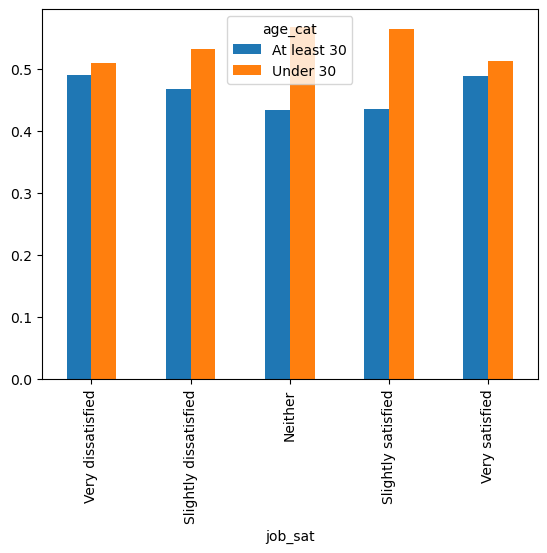

In [339]:
wide_props.plot(kind='bar',stacked=False)
# stacked cubuklarin ayri ayri cizilmesini saglar.

<Axes: xlabel='job_sat'>

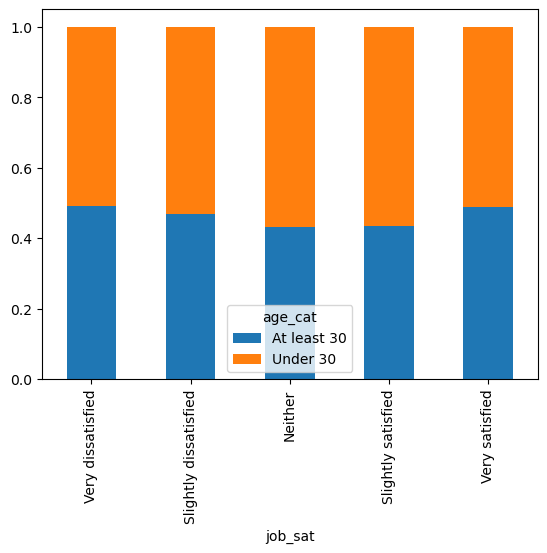

In [343]:
wide_props.plot(kind='bar',stacked=True)

In [15]:
excepted,observed,stats=pingouin.chi2_independence(data=df_stck,x='job_sat',y='age_cat')
stats
# alpha yi 0.01 olarak almistik. Tablodan gorundugu gibi p value degeri 0.23 cikip alpha dan buyuk oldugundan H0 hipotezi reddedilemez.
# Yani yas kategorisi, is mutluluk duzeyine baglidir.
# dof = (Satir Sayisi - 1) x (Sutun Sayisi - 1) (wide_props a bak.)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.552373,4.0,0.235164,0.049555,0.437417
1,cressie-read,0.666667,5.554106,4.0,0.235014,0.049563,0.437545
2,log-likelihood,0.000000,5.558529,4.0,0.234632,0.049583,0.437871
3,freeman-tukey,-0.500000,5.562688,4.0,0.234274,0.049601,0.438178
4,mod-log-likelihood,-1.000000,5.567570,4.0,0.233854,0.049623,0.438538
5,neyman,-2.000000,5.579519,4.0,0.232828,0.049676,0.439419


In [353]:
props=df_stck.groupby('age_cat')['job_sat'].value_counts(normalize=True)
wide_props=props.unstack()
wide_props # Tersten.

job_sat,Very dissatisfied,Slightly dissatisfied,Neither,Slightly satisfied,Very satisfied
age_cat,,,,,
At least 30,0.074286,0.152381,0.082857,0.281905,0.408571
Under 30,0.066887,0.150289,0.094137,0.317093,0.371594


<Axes: xlabel='age_cat'>

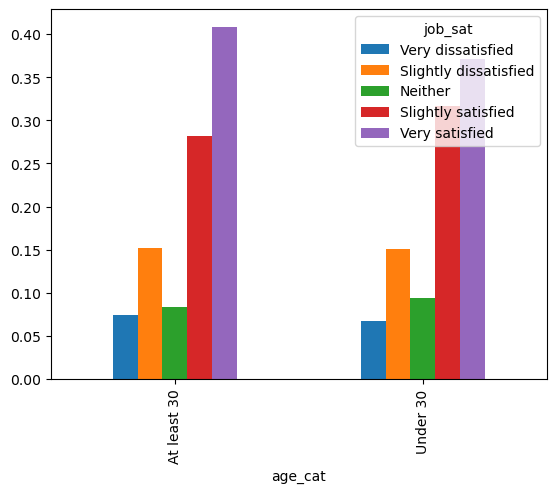

In [355]:
wide_props.plot(kind='bar',stacked=False)

<Axes: xlabel='age_cat'>

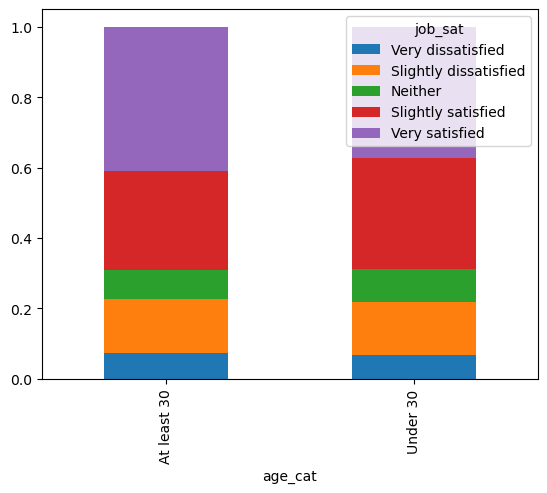

In [361]:
props=df_stck.groupby('age_cat')['job_sat'].value_counts(normalize=True)
wide_props=props.unstack()
wide_props.plot(kind='bar',stacked=True)

In [371]:
excepted,observed,stats=pingouin.chi2_independence(data=df_stck,x='age_cat',y='job_sat')
stats[stats['test']=='pearson'] # Direkt pearson testi cektik.

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,5.552373,4.0,0.235164,0.049555,0.437417


In [373]:
### Ki Kare Testi ve Pearson Testi ile Farklari :

# Ki kare testi, kategorik (nominal veya ordinal) değişkenler arasındaki ilişkiyi veya bağımsızlıklarını test etmek için kullanılır. 
# Özellikle, gözlemlenen frekansların beklenen frekanslarla uyumlu olup olmadığını test eder.
# Örnek Kullanım: Bir kişinin cinsiyetine göre hobilerinin dağılımı farklı mı? (Cinsiyet ve hobiler kategorik değişkenlerdir).

# Pearson testi, sürekli (sayısal) değişkenler arasındaki doğrusal ilişkiyi test etmek için kullanılır. Yani, iki değişken arasındaki doğrusal
# ilişkiyi ölçer ve bu ilişkinin gücünü ve yönünü belirler.
# Örnek Kullanım: Bir kişinin boyu ile kilosu arasındaki ilişkiyi ölçme.


In [375]:
### Ki Kare Uyum Iyiligi Testleri :

# Bir kategorik veri setinin belirli bir teorik dağılıma uygun olup olmadığını test etmek için kullanılır.

In [377]:
### Mor Baglantilar (Purple Links) :

# Mor bağlantılar (purple links), genellikle bir web sayfasında daha önce ziyaret ettiğiniz ve tıkladığınız bağlantılara işaret eder.
# Birçok web tarayıcısında, bağlantılar ilk kez ziyaret edildiğinde genellikle mavi renkli görünür. Ancak, bağlantıya tıkladığınızda ve 
# sayfayı tekrar ziyaret ettiğinizde, bağlantı genellikle mor renk alır. Bu sayede, kullanıcılar hangi bağlantıları daha önce ziyaret 
# ettiklerini kolayca anlayabilirler.

In [ ]:
##### Ki Kare Uyumu Testi :

In [ ]:
# H0: "Bağlantı türü ile yaş kategorisi arasında bağımsızlık vardır."
# H1: "Bağlantı türü ile yaş kategorisi arasında bağımlılık vardır."

In [100]:
### 1. Gözlemlenen (Observed) Dağılımı Saymak :

purple_link_counts=df_stck['purple_link'].value_counts()
purple_link_counts

purple_link
Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: count, dtype: int64

In [102]:
### 2. Gözlemlenen Dağılımı Düzenlemek : 

purple_link_counts=purple_link_counts.rename_axis('purple_link').reset_index(name='n').sort_values('purple_link')
purple_link_counts=pd.DataFrame(purple_link_counts)
purple_link_counts
# purple_link adını eksene verir.
# İndeksi sıfırlayarak, indeks bilgilerini 'n' adında bir sütun olarak ekler.
# Son olarak, 'purple_link' sütununa göre veriyi artan şekilde sıralar.

,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


In [104]:
### 3. Beklenen (Hypothesized) Dağılımı Oluşturmak :

hypothesized=pd.DataFrame({'purple_link':['Amused','Annoyed','Hello old friend','Indifferent'],'prop':[1/6 , 1/6 , 1/2 , 1/6]})
hypothesized

,purple_link,prop
0,Amused,0.166667
1,Annoyed,0.166667
2,Hello old friend,0.500000
3,Indifferent,0.166667


In [106]:
### 4. Toplam Gözlem Sayısını Hesaplamak :

n_total=len(df_stck)
n_total

2261

In [108]:
### 5. Beklenen (Hypothesized) Kategorilerinin Sayısını Hesaplamak :

hypothesized['n']=hypothesized['prop']*n_total
hypothesized

# Kategoriye göre varsayılan sayılar purple_link dağılımını görselleştirmek için, her bir yanıt için varsayılan sayıların bulunması yardımcı
# olacaktır. Bu sayılar, varsayılan oranların örneklemdeki toplam gözlem sayısıyla çarpılmasıyla hesaplanır.

,purple_link,prop,n
0,Amused,0.166667,376.833333
1,Annoyed,0.166667,376.833333
2,Hello old friend,0.500000,1130.500000
3,Indifferent,0.166667,376.833333


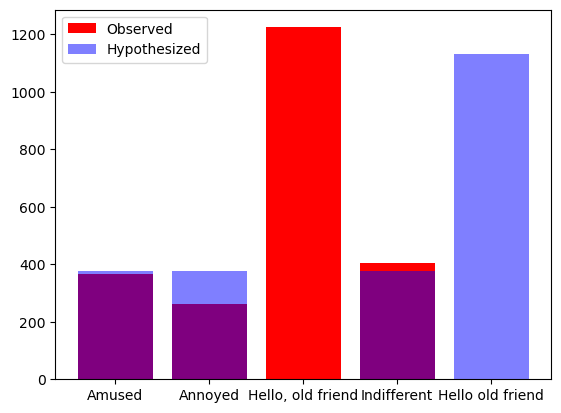

In [539]:
### 7. Beklenen Verilerin Görselini Oluşturmak :

plt.bar(purple_link_counts['purple_link'],purple_link_counts['n'],label='Observed',color='Red')
plt.bar(hypothesized['purple_link'],hypothesized['n'],label='Hypothesized',color='blue',alpha=0.5)
plt.legend() # Her renk icin bir aciklama ekler.

In [541]:
### 8. Ki Kare Testi :

from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts['n'],f_exp=hypothesized['n'])

# Testin sonucuna gore p value hesaplanirsa 0.00000000113 olarak cikiyor. Bizim alpha degerimiz ise 0.05 p value < alpha oldugundan H0 i
# reddediyoruz. Yani bagimlilik vardir diyoruz. Bunun haricinde ki kare testinin istatistigi ve p value arasinda da cok buyuk bir fark 
# oldugundan bu da H0 i reddetmemize olanak saglar.

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413717e-09)

In [ ]:
"""

1. Large Sample Size : Büyük örneklem büyüklüğü, istatistiksel analizlerin güvenilirliğini artırır çünkü daha fazla veri, hataları ve 
sapmaları minimize eder.

2. Large Sample Size t-test : Büyük örneklem büyüklüğünde yapılan t-testi, iki grup arasındaki farkın anlamlı olup olmadığını test eder ve
genellikle parametrelerin normal dağılım gösterdiği varsayılır.

3. Sanity Check: Verinin mantıklı olup olmadığını kontrol etmek için yapılan hızlı doğrulama testidir; genellikle veri seti ile ilgili açık
hataları tespit etmeye yöneliktir.

4. Non-parametric Tests: Parametrik varsayımlar gerektirmeyen ve sıklıkla sıralı veya kategorik verilerle yapılan testlerdir, örneğin 
Mann-Whitney U testi.

5. Parametric Tests: Verinin belirli parametreleri (örneğin normal dağılım) hakkında varsayımlar yapılır ve bu varsayımlara dayalı olarak 
yapılan testlerdir, örneğin t-testi.

"""